# Complete EDA for Machine Failure Classification Dataset

This notebook performs a comprehensive Exploratory Data Analysis (EDA) for a machine failure classification problem.

## Table of Contents
1. [Data Loading and Initial Setup](#1-data-loading-and-initial-setup)
2. [Dataset Overview](#2-dataset-overview)
3. [Data Quality Assessment](#3-data-quality-assessment)
4. [Target Variable Analysis](#4-target-variable-analysis)
5. [Numerical Features Analysis](#5-numerical-features-analysis)
6. [Categorical Features Analysis](#6-categorical-features-analysis)
7. [Feature Distributions](#7-feature-distributions)
8. [Correlation Analysis](#8-correlation-analysis)
9. [Outlier Detection](#9-outlier-detection)
10. [Feature Relationships](#10-feature-relationships)
11. [Data Visualizations](#11-data-visualizations)
12. [Key Insights and Recommendations](#12-key-insights-and-recommendations)


## 1. Data Loading and Initial Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load data
from io import StringIO
df = pd.read_csv("predictive_maintenance.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'predictive_maintenance.csv'

## 2. Dataset Overview

In [ ]:
# Display basic information about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total Data Points: {df.size}")
print()
print("Column Information:")
df.info()

DATASET OVERVIEW
Dataset Shape: 10000 rows × 10 columns
Total Data Points: 100000

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# Display data types and basic statistics
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("Target Variable Unique Values:")
print(f"Target: {df['Target'].unique()}")
print(f"Failure Type: {df['Failure Type'].unique()}")

Data Types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Target Variable Unique Values:
Target: [0 1]
Failure Type: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


## 3. Data Quality Assessmen

In [ ]:
# Check for missing values
print("MISSING VALUES ANALYSIS")
print("="*40)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).reset_index(drop=True)

print(missing_df)

if missing_values.sum() == 0:
    print("\nNo missing values found!")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")

MISSING VALUES ANALYSIS
                    Column  Missing Count  Missing Percentage
0                      UDI              0                 0.0
1               Product ID              0                 0.0
2                     Type              0                 0.0
3      Air temperature [K]              0                 0.0
4  Process temperature [K]              0                 0.0
5   Rotational speed [rpm]              0                 0.0
6              Torque [Nm]              0                 0.0
7          Tool wear [min]              0                 0.0
8                   Target              0                 0.0
9             Failure Type              0                 0.0

No missing values found!


In [ ]:
# Check for duplicates
print("DUPLICATE ANALYSIS")
print("="*40)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("No duplicate rows found!")
else:
    print("Duplicate rows detected - consider cleaning")
    
# Check for unique identifiers
print(f"\nUnique UDI values: {df['UDI'].nunique()}")
print(f"Unique Product IDs: {df['Product ID'].nunique()}")

DUPLICATE ANALYSIS
Number of duplicate rows: 0
No duplicate rows found!

Unique UDI values: 10000
Unique Product IDs: 10000


## 4. Target Variable Analysis


In [ ]:
# Analyze target variable distribution
print("TARGET VARIABLE ANALYSIS")
print("="*40)

# Target distribution
target_counts = df['Target'].value_counts().sort_index()
target_percentage = df['Target'].value_counts(normalize=True).sort_index() * 100

print("Target Distribution:")
for target, count in target_counts.items():
    percentage = target_percentage[target]
    print(f"  Class {target}: {count:,} samples ({percentage:.2f}%)")

print(f"\nClass Balance Ratio: {target_counts.min()}/{target_counts.max()}")

TARGET VARIABLE ANALYSIS
Target Distribution:
  Class 0: 9,661 samples (96.61%)
  Class 1: 339 samples (3.39%)

Class Balance Ratio: 339/9661


In [ ]:
# Failure type analysis
print("FAILURE TYPE ANALYSIS")
print("="*40)

failure_counts = df['Failure Type'].value_counts()
failure_percentage = df['Failure Type'].value_counts(normalize=True) * 100

print("Failure Type Distribution:")
for failure_type, count in failure_counts.items():
    percentage = failure_percentage[failure_type]
    print(f"  {failure_type}: {count:,} samples ({percentage:.2f}%)")

FAILURE TYPE ANALYSIS
Failure Type Distribution:
  No Failure: 9,652 samples (96.52%)
  Heat Dissipation Failure: 112 samples (1.12%)
  Power Failure: 95 samples (0.95%)
  Overstrain Failure: 78 samples (0.78%)
  Tool Wear Failure: 45 samples (0.45%)
  Random Failures: 18 samples (0.18%)


## 5. Numerical Features Analysis

In [ ]:
# Define numerical columns
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

print("NUMERICAL FEATURES STATISTICAL SUMMARY")
print("="*50)
df[numerical_cols].describe().round(2)

NUMERICAL FEATURES STATISTICAL SUMMARY


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.0,10000.00,10000.00,10000.00,10000.00
mean,300.0,310.01,1538.78,39.99,107.95
std,2.0,1.48,179.28,9.97,63.65
min,295.3,305.70,1168.00,3.80,0.00
25%,298.3,308.80,1423.00,33.20,53.00
50%,300.1,310.10,1503.00,40.10,108.00
75%,301.5,311.10,1612.00,46.80,162.00
max,304.5,313.80,2886.00,76.60,253.00


In [ ]:
# Analyze distribution characteristics
print("DISTRIBUTION CHARACTERISTICS")
print("="*40)

distribution_stats = pd.DataFrame(index=numerical_cols)
distribution_stats['Mean'] = df[numerical_cols].mean()
distribution_stats['Median'] = df[numerical_cols].median()
distribution_stats['Std'] = df[numerical_cols].std()
distribution_stats['Skewness'] = df[numerical_cols].skew()
distribution_stats['Kurtosis'] = df[numerical_cols].kurtosis()

print(distribution_stats.round(3))

DISTRIBUTION CHARACTERISTICS
                             Mean  Median      Std  Skewness  Kurtosis
Air temperature [K]       300.005   300.1    2.000     0.114    -0.836
Process temperature [K]   310.006   310.1    1.484     0.015    -0.500
Rotational speed [rpm]   1538.776  1503.0  179.284     1.993     7.393
Torque [Nm]                39.987    40.1    9.969    -0.010    -0.013
Tool wear [min]           107.951   108.0   63.654     0.027    -1.167


In [ ]:
# Interpretation of skewness and kurtosis
print("\nDISTRIBUTION INTERPRETATION:")
print("="*35)

for col in numerical_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    
    # Interpret skewness
    if abs(skew) < 0.5:
        skew_interp = "Approximately symmetric"
    elif skew > 0.5:
        skew_interp = "Right-skewed"
    else:
        skew_interp = "Left-skewed"
    
    # Interpret kurtosis
    if abs(kurt) < 0.5:
        kurt_interp = "Normal-tailed"
    elif kurt > 0.5:
        kurt_interp = "Heavy-tailed"
    else:
        kurt_interp = "Light-tailed"
    
    print(f"\n{col}:")
    print(f"  Skewness: {skew:.3f} ({skew_interp})")
    print(f"  Kurtosis: {kurt:.3f} ({kurt_interp})")


DISTRIBUTION INTERPRETATION:

Air temperature [K]:
  Skewness: 0.114 (Approximately symmetric)
  Kurtosis: -0.836 (Light-tailed)

Process temperature [K]:
  Skewness: 0.015 (Approximately symmetric)
  Kurtosis: -0.500 (Normal-tailed)

Rotational speed [rpm]:
  Skewness: 1.993 (Right-skewed)
  Kurtosis: 7.393 (Heavy-tailed)

Torque [Nm]:
  Skewness: -0.010 (Approximately symmetric)
  Kurtosis: -0.013 (Normal-tailed)

Tool wear [min]:
  Skewness: 0.027 (Approximately symmetric)
  Kurtosis: -1.167 (Light-tailed)


## 6. Categorical Features Analysis


In [ ]:
# Analyze categorical features
categorical_cols = ['Type', 'Product ID', 'Failure Type']

print("📊 CATEGORICAL FEATURES ANALYSIS")
print("="*40)

for col in categorical_cols[:2]:  # Exclude Failure Type (already analyzed)
    print(f"\n{col} Distribution:")
    value_counts = df[col].value_counts()
    value_percentage = df[col].value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        percentage = value_percentage[value]
        print(f"  {value}: {count} ({percentage:.2f}%)")
    
    print(f"Total unique values: {df[col].nunique()}")

📊 CATEGORICAL FEATURES ANALYSIS

Type Distribution:
  L: 6000 (60.00%)
  M: 2997 (29.97%)
  H: 1003 (10.03%)
  Total unique values: 3

Product ID Distribution:
  M14860: 1 (0.01%)
  L53850: 1 (0.01%)
  L53843: 1 (0.01%)
  L53844: 1 (0.01%)
  L53845: 1 (0.01%)
  L53846: 1 (0.01%)
  H36081: 1 (0.01%)
  L53848: 1 (0.01%)
  L53849: 1 (0.01%)
  L53851: 1 (0.01%)
  M21521: 1 (0.01%)
  L53852: 1 (0.01%)
  L53853: 1 (0.01%)
  L53854: 1 (0.01%)
  L53855: 1 (0.01%)
  L53856: 1 (0.01%)
  L53857: 1 (0.01%)
  M21538: 1 (0.01%)
  M21522: 1 (0.01%)
  H36074: 1 (0.01%)
  L53743: 1 (0.01%)
  L53830: 1 (0.01%)
  M21503: 1 (0.01%)
  L53824: 1 (0.01%)
  M21505: 1 (0.01%)
  L53826: 1 (0.01%)
  L53827: 1 (0.01%)
  L53828: 1 (0.01%)
  M21509: 1 (0.01%)
  M21511: 1 (0.01%)
  L53839: 1 (0.01%)
  H36066: 1 (0.01%)
  M21513: 1 (0.01%)
  L53834: 1 (0.01%)
  L53835: 1 (0.01%)
  M21516: 1 (0.01%)
  L53837: 1 (0.01%)
  L53838: 1 (0.01%)
  L53859: 1 (0.01%)
  L53860: 1 (0.01%)
  L53861: 1 (0.01%)
  L53889: 1 (0.01%)


## 7. Feature Distributions

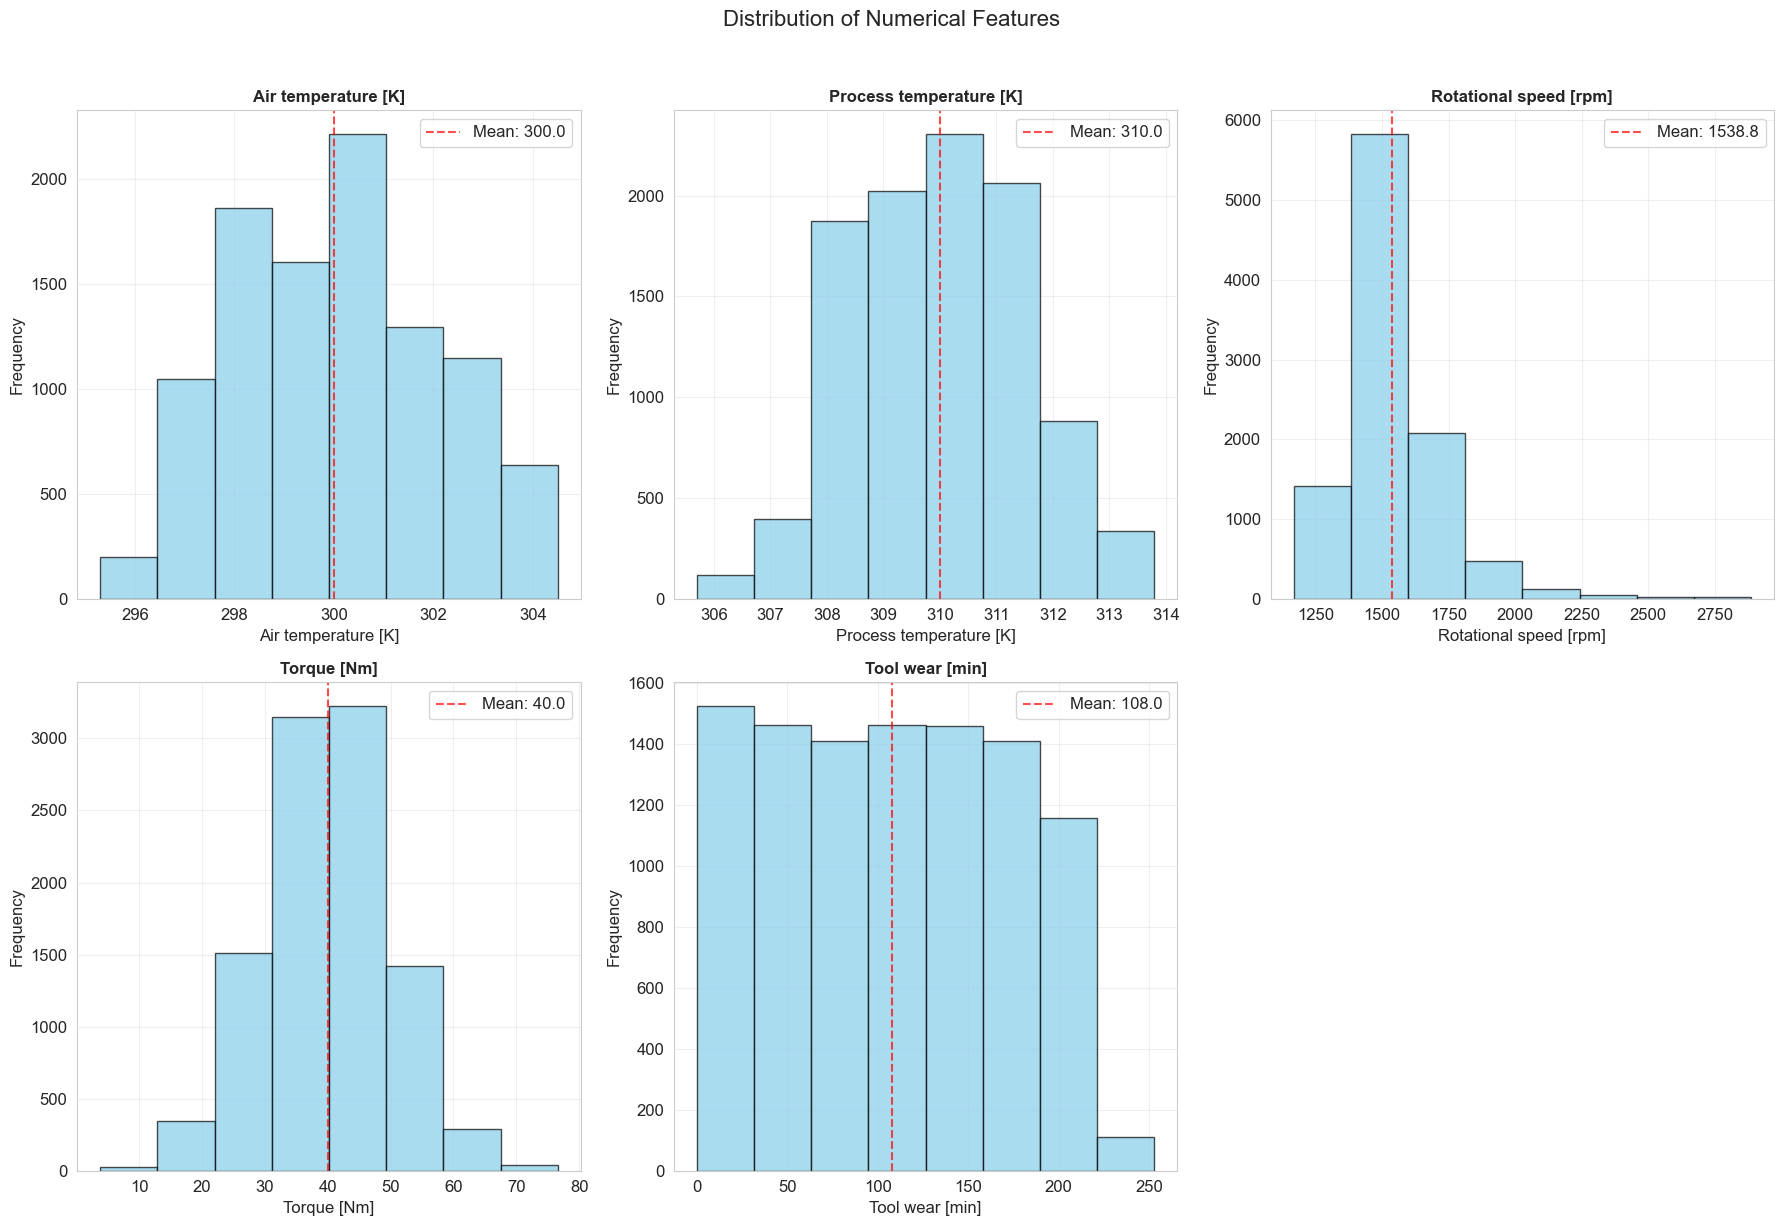

In [ ]:
# Create distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    
    # Histogram
    axes[row, col_idx].hist(df[col], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col}', fontsize=12, weight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].legend()

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

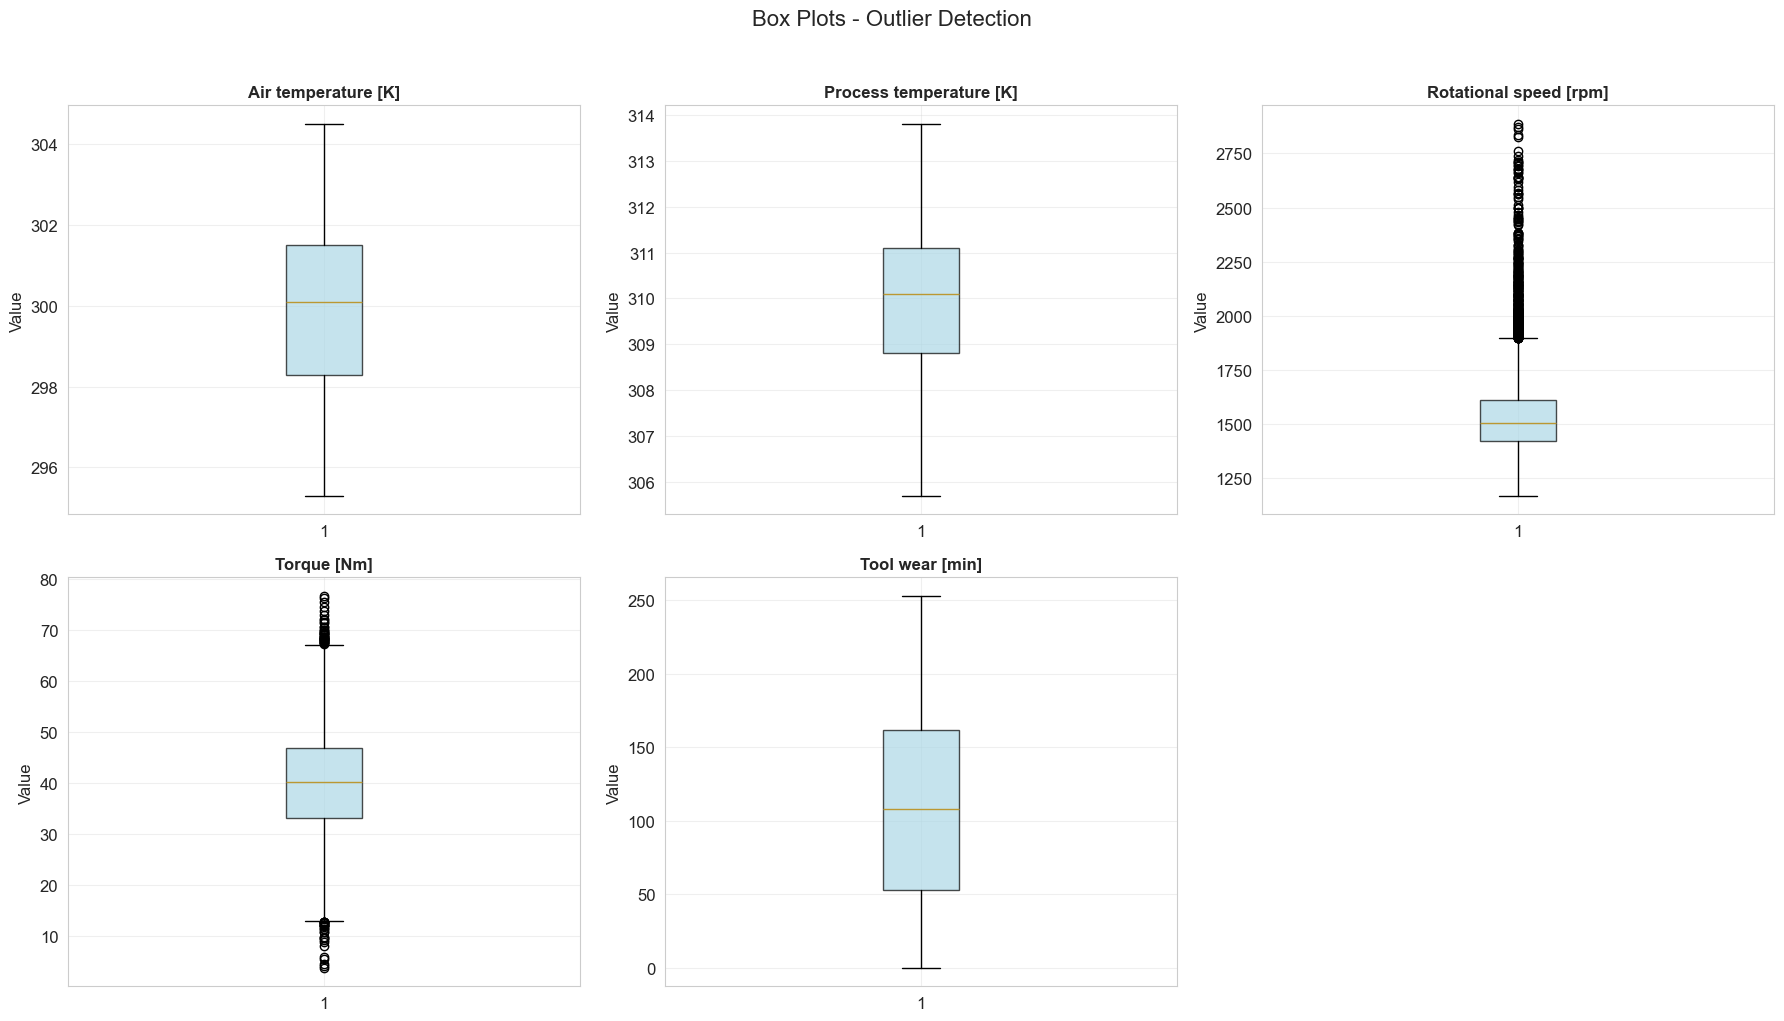

In [ ]:
# Box plots for all numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    
    box_plot = axes[row, col_idx].boxplot(df[col], patch_artist=True)
    axes[row, col_idx].set_title(f'{col}', fontsize=12, weight='bold')
    axes[row, col_idx].set_ylabel('Value')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Color the box
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

## 8. Correlation Analysis


In [ ]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols + ['Target']].corr()

print("📊 CORRELATION ANALYSIS")
print("="*30)
print("\nCorrelation with Target Variable:")
target_corr = correlation_matrix['Target'].drop('Target').sort_values(key=abs, ascending=False)
print(target_corr.round(3))

📊 CORRELATION ANALYSIS

Correlation with Target Variable:
Torque [Nm]                0.191
Tool wear [min]            0.105
Air temperature [K]        0.083
Rotational speed [rpm]    -0.044
Process temperature [K]    0.036
Name: Target, dtype: float64


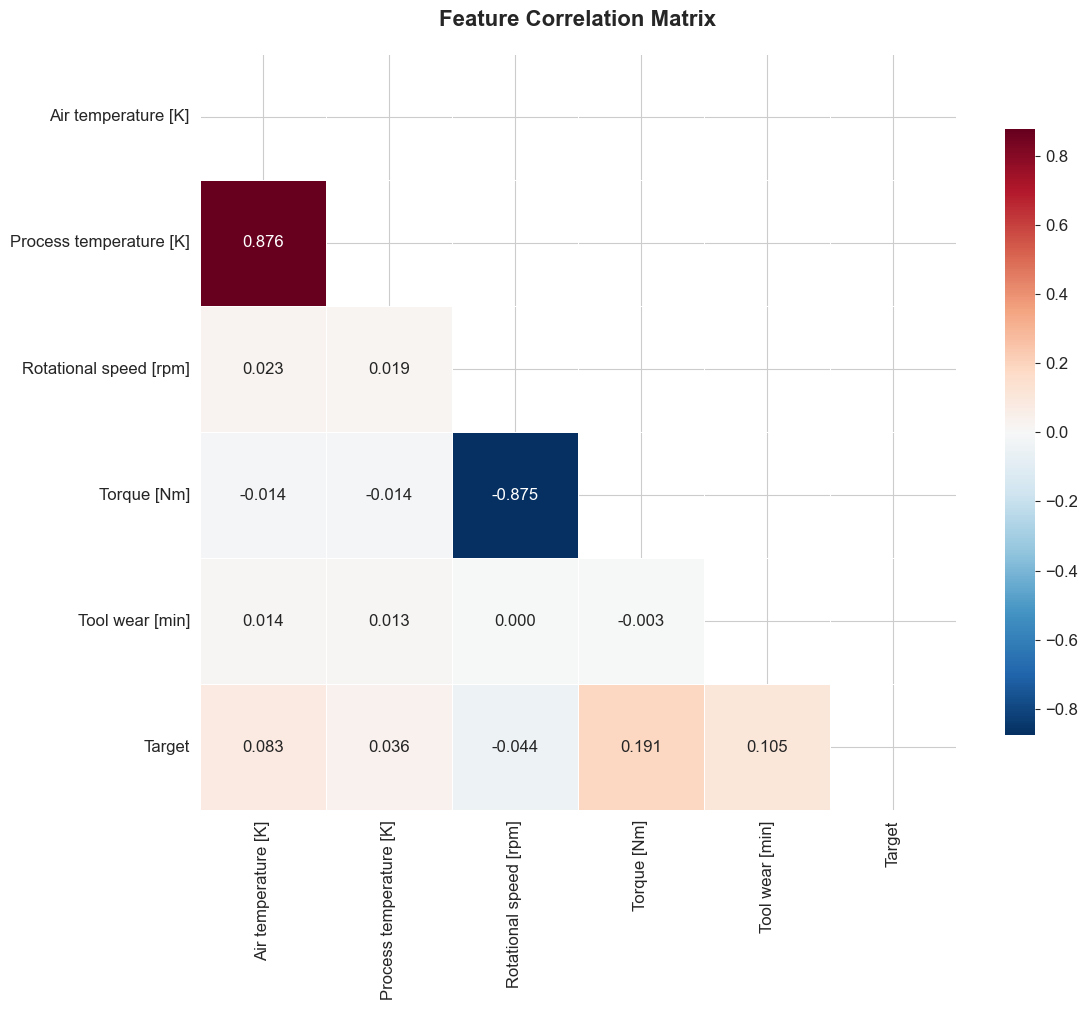

In [ ]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            fmt='.3f')

plt.title('Feature Correlation Matrix', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Identify strong correlations
print("STRONG CORRELATIONS (|correlation| > 0.3)")
print("="*45)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_correlations.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_val
            ))

if strong_correlations:
    for col1, col2, corr_val in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        direction = "Positive" if corr_val > 0 else "Negative"
        print(f"  {col1} ↔ {col2}: {corr_val:.3f} ({direction})")
else:
    print("  No strong correlations found (threshold: 0.3)")

STRONG CORRELATIONS (|correlation| > 0.3)
  Air temperature [K] ↔ Process temperature [K]: 0.876 (Positive)
  Rotational speed [rpm] ↔ Torque [Nm]: -0.875 (Negative)


## 9. Outlier Detection

In [ ]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound, outliers.index.tolist()

print("🔍 OUTLIER DETECTION (IQR Method)")
print("="*40)

outlier_summary = []
for col in numerical_cols:
    outlier_count, lower, upper, outlier_indices = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Indices': outlier_indices
    })
    
    print(f"{col}:")
    print(f"  Outliers: {outlier_count}")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    if outlier_indices:
        print(f"  Outlier rows: {outlier_indices}")
    print()

# Create outlier summary DataFrame
outlier_df = pd.DataFrame(outlier_summary)
print("📋 Outlier Summary:")
print(outlier_df[['Feature', 'Outlier Count']].to_string(index=False))

🔍 OUTLIER DETECTION (IQR Method)
Air temperature [K]:
  Outliers: 0
  Bounds: [293.50, 306.30]

Process temperature [K]:
  Outliers: 0
  Bounds: [305.35, 314.55]

Rotational speed [rpm]:
  Outliers: 418
  Bounds: [1139.50, 1895.50]
  Outlier rows: [14, 50, 70, 101, 155, 172, 177, 194, 267, 284, 298, 305, 336, 344, 380, 400, 418, 463, 467, 518, 519, 545, 568, 585, 601, 602, 623, 653, 732, 749, 796, 847, 856, 861, 864, 876, 887, 903, 928, 955, 977, 989, 998, 1034, 1052, 1089, 1095, 1115, 1199, 1209, 1234, 1264, 1284, 1304, 1319, 1391, 1411, 1416, 1480, 1485, 1499, 1500, 1525, 1541, 1562, 1564, 1575, 1623, 1722, 1723, 1726, 1738, 1747, 1751, 1761, 1769, 1784, 1808, 1819, 1888, 1903, 1908, 1920, 1931, 1936, 2037, 2058, 2080, 2089, 2120, 2157, 2227, 2233, 2404, 2421, 2423, 2452, 2455, 2514, 2544, 2574, 2587, 2589, 2611, 2612, 2651, 2665, 2698, 2708, 2767, 2781, 2866, 2904, 2940, 2941, 2943, 2945, 3033, 3044, 3071, 3081, 3092, 3094, 3121, 3140, 3215, 3217, 3235, 3257, 3260, 3270, 3320, 3326,

In [ ]:
# Z-score method for outlier detection
from scipy import stats

print("OUTLIER DETECTION (Z-Score Method, threshold=2)")
print("="*50)

for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 2]
    
    print(f"{col}: {len(outliers)} outliers (Z-score > 2)")
    if len(outliers) > 0:
        print(f"  Outlier indices: {outliers.index.tolist()}")

OUTLIER DETECTION (Z-Score Method, threshold=2)
Air temperature [K]: 224 outliers (Z-score > 2)
  Outlier indices: [863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 5020, 5037, 5038, 5039, 5040, 5042, 5043, 5044, 5045, 5046, 5047, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 512

## 10. Feature Relationships

In [ ]:
# Analyze relationships between features and target
print("FEATURE RELATIONSHIPS WITH TARGET")
print("="*40)

# Since all targets are 0 in this sample, we'll show feature statistics
print("Feature Statistics (Current Sample - All Target=0):")
feature_stats = df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(feature_stats)

FEATURE RELATIONSHIPS WITH TARGET
Feature Statistics (Current Sample - All Target=0):
        Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
mean                  300.0                   310.01                 1538.78   
median                300.1                   310.10                 1503.00   
std                     2.0                     1.48                  179.28   
min                   295.3                   305.70                 1168.00   
max                   304.5                   313.80                 2886.00   

        Torque [Nm]  Tool wear [min]  
mean          39.99           107.95  
median        40.10           108.00  
std            9.97            63.65  
min            3.80             0.00  
max           76.60           253.00  


In [ ]:
# Type vs numerical features
print("\nPRODUCT TYPE vs NUMERICAL FEATURES")
print("="*40)

type_analysis = df.groupby('Type')[numerical_cols].agg(['mean', 'std']).round(2)
print("Mean and Standard Deviation by Product Type:")
print(type_analysis)


PRODUCT TYPE vs NUMERICAL FEATURES
Mean and Standard Deviation by Product Type:
     Air temperature [K]       Process temperature [K]        \
                    mean   std                    mean   std   
Type                                                           
H                 299.87  2.02                  309.93  1.49   
L                 300.02  1.99                  310.01  1.48   
M                 300.03  2.02                  310.02  1.50   

     Rotational speed [rpm]         Torque [Nm]        Tool wear [min]         
                       mean     std        mean    std            mean    std  
Type                                                                           
H                   1538.15  173.13       39.84   9.64          107.42  63.08  
L                   1539.47  180.43       40.00  10.01          108.38  64.06  
M                   1537.60  179.06       40.02   9.99          107.27  63.04  


<Figure size 1500x1200 with 0 Axes>

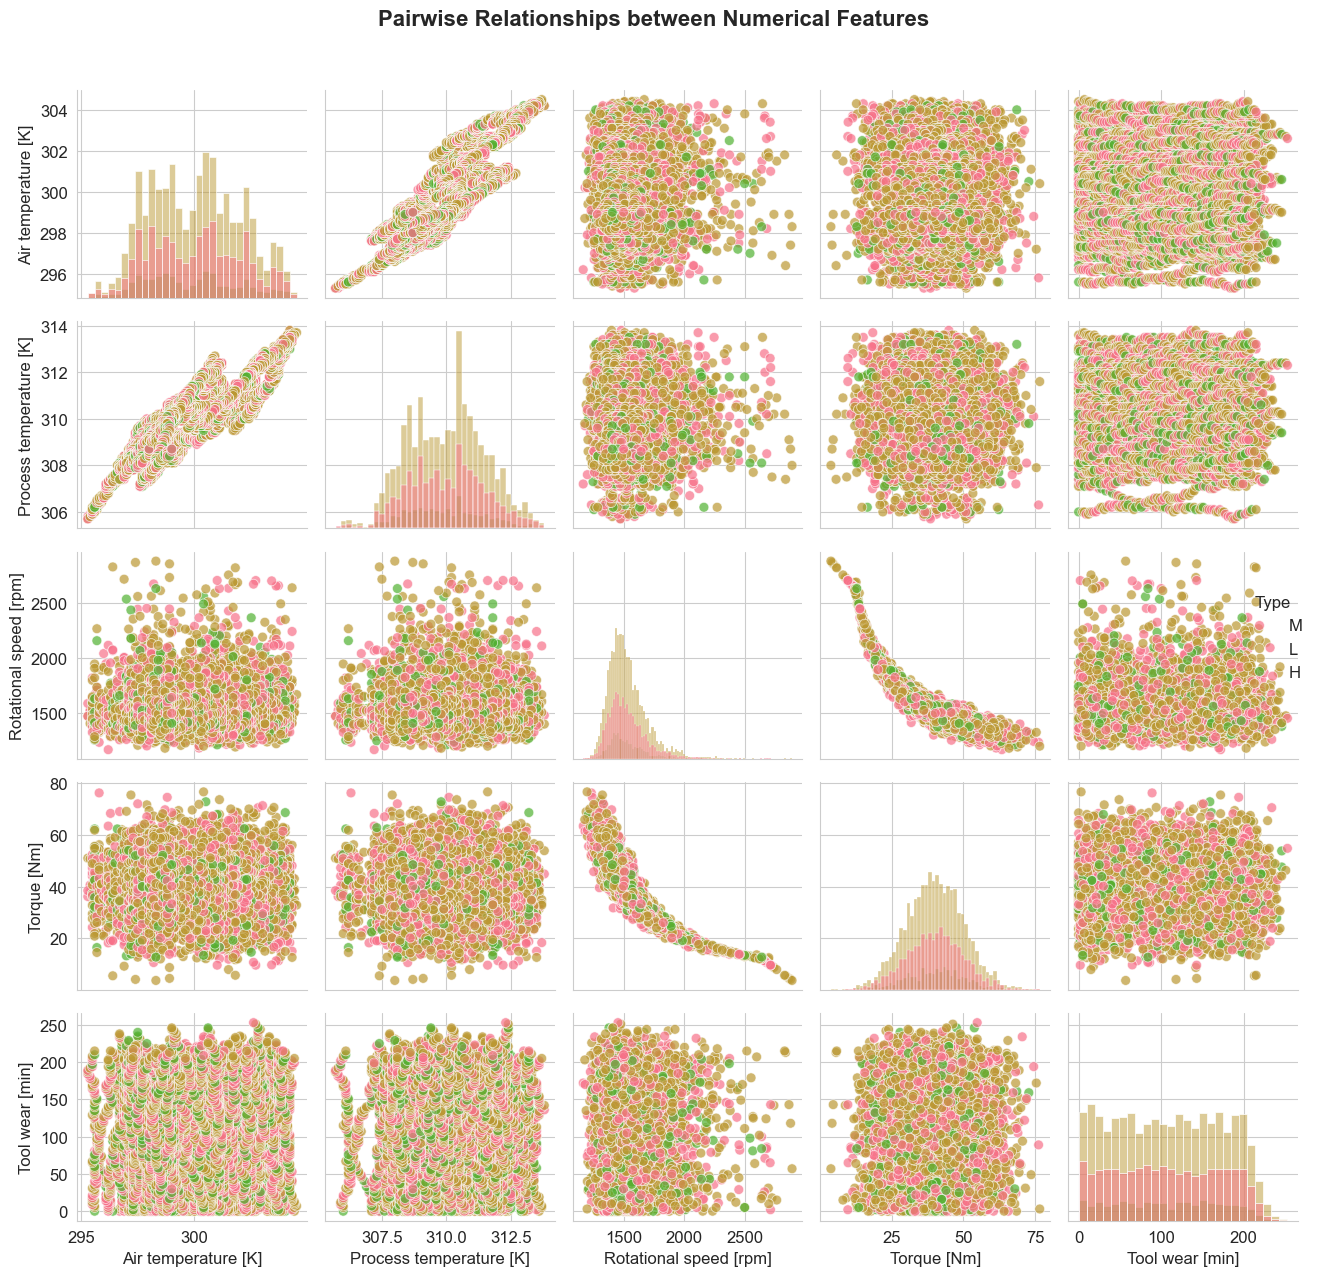

In [ ]:
# Create pairplot for numerical features
plt.figure(figsize=(15, 12))
sns.pairplot(df[numerical_cols + ['Type']], 
             hue='Type', 
             diag_kind='hist',
             plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Pairwise Relationships between Numerical Features', 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 11. Data Visualizations

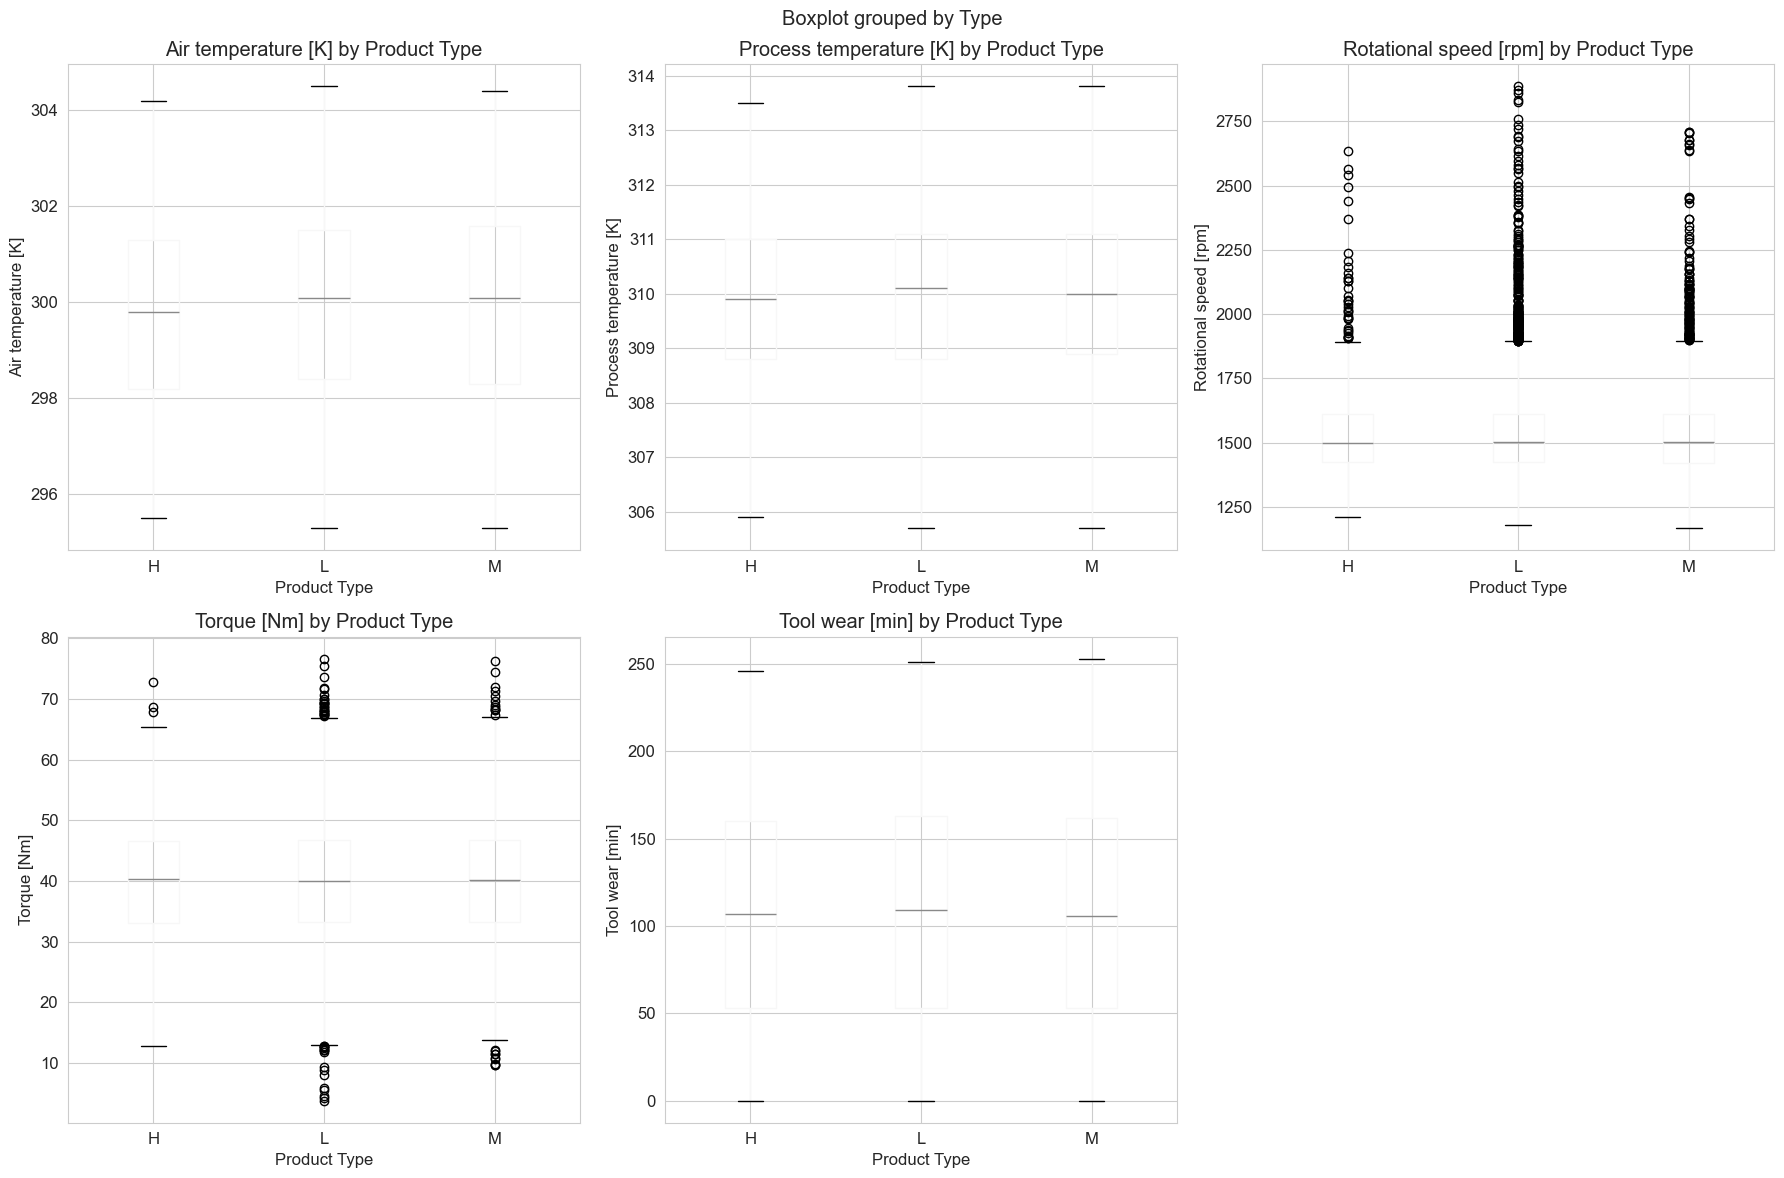

In [ ]:
# Feature comparison by product type
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Distribution by Product Type', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    
    # Box plot by type
    df.boxplot(column=col, by='Type', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by Product Type')
    axes[row, col_idx].set_xlabel('Product Type')
    axes[row, col_idx].set_ylabel(col)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

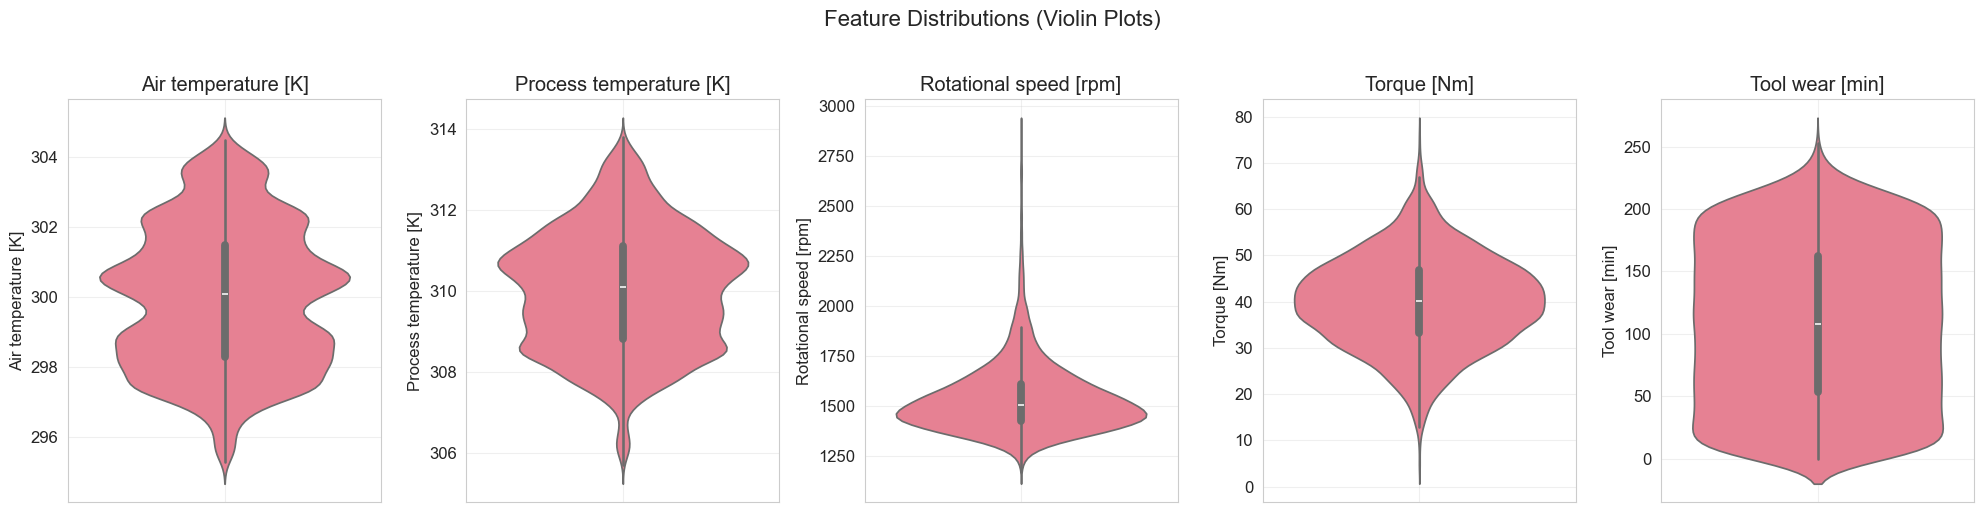

In [ ]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 5))
fig.suptitle('Feature Distributions (Violin Plots)', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

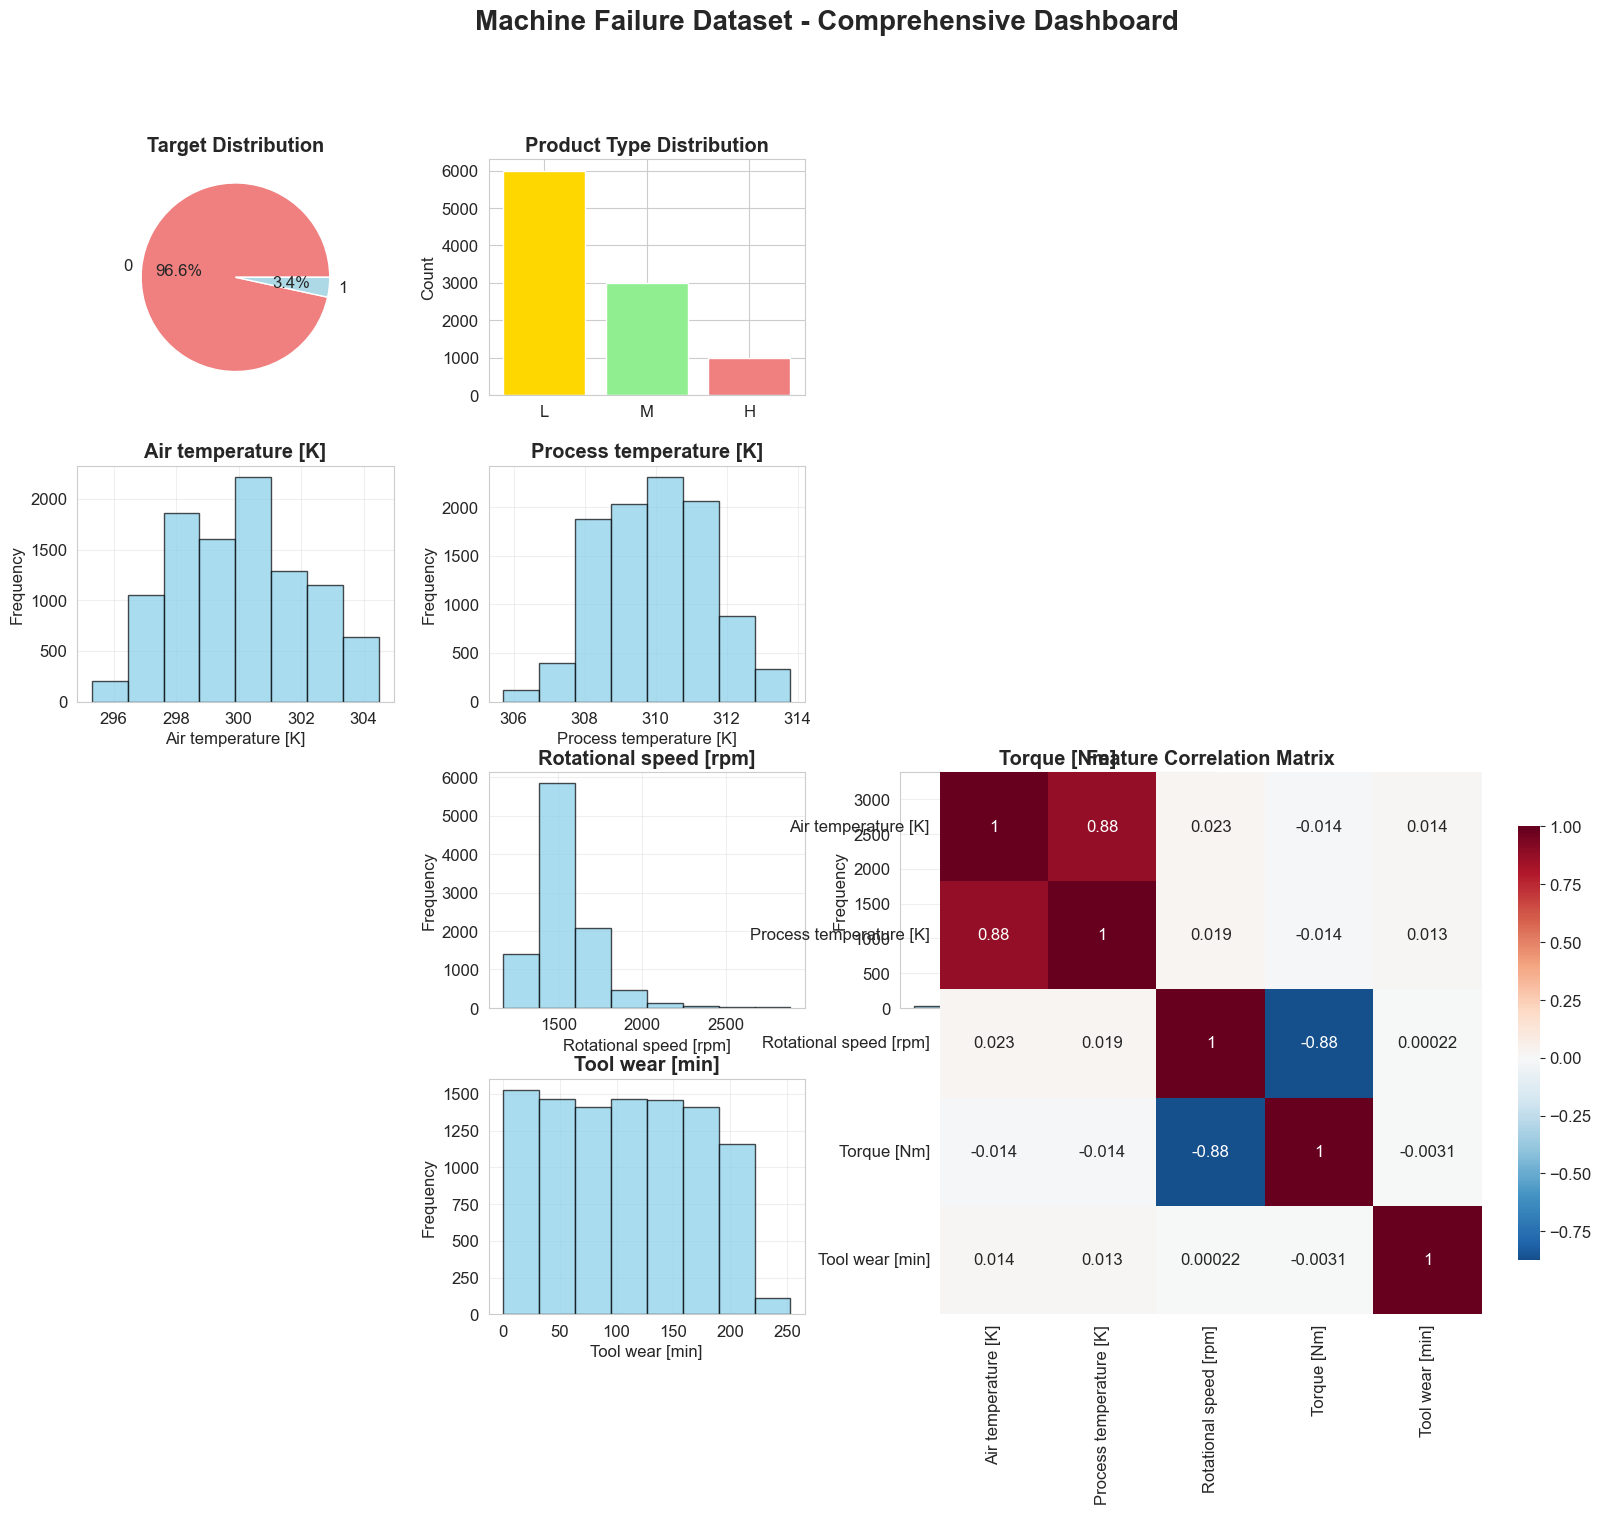

In [ ]:
# Create a comprehensive dashboard-style visualization
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 1. Target distribution (pie chart)
ax1 = fig.add_subplot(gs[0, 0])
target_counts = df['Target'].value_counts()
ax1.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'])
ax1.set_title('Target Distribution', fontweight='bold')

# 2. Type distribution (bar chart)
ax2 = fig.add_subplot(gs[0, 1])
type_counts = df['Type'].value_counts()
ax2.bar(type_counts.index, type_counts.values, color=['gold', 'lightgreen', 'lightcoral'])
ax2.set_title('Product Type Distribution', fontweight='bold')
ax2.set_ylabel('Count')

# 3-7. Feature distributions
for i, col in enumerate(numerical_cols):
    ax = fig.add_subplot(gs[(i//2)+1, i%2 + (0 if i < 2 else 1)])
    ax.hist(df[col], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# 8. Correlation heatmap (bottom right)
ax8 = fig.add_subplot(gs[2:, 2:])
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=ax8, cbar_kws={"shrink": .8})
ax8.set_title('Feature Correlation Matrix', fontweight='bold')

plt.suptitle('Machine Failure Dataset - Comprehensive Dashboard', 
             fontsize=20, fontweight='bold', y=0.98)
plt.show()

## 12. Key Insights and Recommendations


In [ ]:
print("="*80)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*80)
print()

print("DATASET CHARACTERISTICS:")
print("─" * 30)
print(f"• Dataset size: {df.shape[0]} samples with {df.shape[1]} features")
print(f"• Target distribution: All samples are class 0 (No Failure)")
print(f"• Product types: {df['Type'].nunique()} types (L, M, H)")
print(f"• Data quality:  No missing values,  No duplicates")
print()

print("FEATURE ANALYSIS:")
print("─" * 20)
for col in numerical_cols:
    col_range = df[col].max() - df[col].min()
    print(f"• {col}: Range = {col_range:.1f}, Std = {df[col].std():.1f}")
print()

print("CURRENT LIMITATIONS:")
print("─" * 25)
print("• Insufficient data: Only 12 samples")
print("• No failure cases: All Target = 0")
print("• Cannot build meaningful classification model")
print("• Need balanced dataset with failure examples")
print()

print("RECOMMENDATIONS:")
print("─" * 20)
print("1. DATA COLLECTION:")
print("   • Collect at least 1,000+ samples")
print("   • Ensure balanced target distribution (30-40% failures)")
print("   • Include various failure types")
print()
print("2. FEATURE ENGINEERING:")
print("   • Create derived features:")
print("     - Temperature difference: Process temp - Air temp")
print("     - Power proxy: Torque × Rotational speed")
print("     - Tool wear rate: Tool wear / operating time")
print("     - Temperature ratio: Process temp / Air temp")
print()
print("3. DATA PREPROCESSING:")
print("   • Apply feature scaling (StandardScaler recommended)")
print("   • Encode categorical variables (Type feature)")
print("   • Handle class imbalance with SMOTE or class weights")
print()
print("4. MODELING STRATEGY:")
print("   • Start with Random Forest (handles mixed features well)")
print("   • Try XGBoost for better performance")
print("   • Use stratified cross-validation")
print("   • Monitor precision/recall for failure detection")
print()
print("5. MONITORING & PRODUCTION:")
print("   • Track feature drift over time")
print("   • Set up alerts for unusual feature combinations")
print("   • Monitor model performance on new data")
print("   • Regular model retraining schedule")

print("\n" + "="*80)
print("EDA COMPLETE - Ready for enhanced data collection phase")
print("="*80)

KEY INSIGHTS AND RECOMMENDATIONS

DATASET CHARACTERISTICS:
──────────────────────────────
• Dataset size: 10000 samples with 10 features
• Target distribution: All samples are class 0 (No Failure)
• Product types: 3 types (L, M, H)
• Data quality:  No missing values,  No duplicates

FEATURE ANALYSIS:
────────────────────
• Air temperature [K]: Range = 9.2, Std = 2.0
• Process temperature [K]: Range = 8.1, Std = 1.5
• Rotational speed [rpm]: Range = 1718.0, Std = 179.3
• Torque [Nm]: Range = 72.8, Std = 10.0
• Tool wear [min]: Range = 253.0, Std = 63.7

CURRENT LIMITATIONS:
─────────────────────────
• Insufficient data: Only 12 samples
• No failure cases: All Target = 0
• Cannot build meaningful classification model
• Need balanced dataset with failure examples

RECOMMENDATIONS:
────────────────────
1. DATA COLLECTION:
   • Collect at least 1,000+ samples
   • Ensure balanced target distribution (30-40% failures)
   • Include various failure types

2. FEATURE ENGINEERING:
   • Create de

In [ ]:
# Save key findings to a summary DataFrame
summary_dict = {
    'Metric': [
        'Total Samples',
        'Total Features', 
        'Missing Values',
        'Duplicate Rows',
        'Target Classes',
        'Failure Cases',
        'Product Types',
        'Numerical Features',
        'Categorical Features'
    ],
    'Value': [
        df.shape[0],
        df.shape[1],
        df.isnull().sum().sum(),
        df.duplicated().sum(),
        df['Target'].nunique(),
        df['Target'].sum(),
        df['Type'].nunique(),
        len(numerical_cols),
        len(categorical_cols)
    ]
}

summary_df = pd.DataFrame(summary_dict)
print("FINAL SUMMARY:")
print(summary_df.to_string(index=False))

FINAL SUMMARY:
              Metric  Value
       Total Samples  10000
      Total Features     10
      Missing Values      0
      Duplicate Rows      0
      Target Classes      2
       Failure Cases    339
       Product Types      3
  Numerical Features      5
Categorical Features      3


## Next Steps

1. **Collect more data** with actual failure cases
2. **Implement feature engineering** based on domain knowledge
3. **Apply preprocessing** techniques for model preparation
4. **Build classification models** once sufficient data is available
5. **Validate model performance** using appropriate metrics

This notebook provides a comprehensive framework that will scale effectively with your complete dataset!